<a href="https://colab.research.google.com/github/erendagstan/ANN_NumberRecognition/blob/main/ANN_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
filterwarnings('ignore')

In [ ]:
# load mnist data
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("Train dataset shape:" ,x_train.shape, y_train.shape)
# 28px x 28px = 784px

Train dataset shape: (60000, 28, 28) (60000,)


In [ ]:
print("Test dataset shape:" ,x_test.shape, y_test.shape)

Test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
num_labels = len(np.unique(y_train)) # target variable unique length
print(num_labels)

10


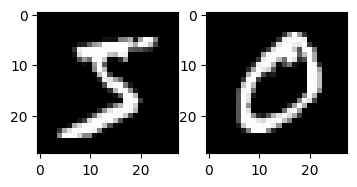

In [ ]:
# analyze data
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.imshow(x_train[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(x_train[1],cmap='gray')
plt.show()

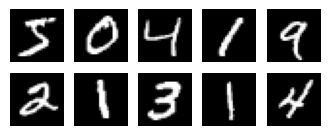

In [ ]:
plt.figure(figsize=(4,4))
for n in range(10):
  ax = plt.subplot(5,5,n+1) # 5row 5column
  plt.imshow(x_train[n],cmap='gray')
  plt.axis('off')

In [ ]:
# functionize that visualize image(data)
def visualize_img(data):
  plt.figure(figsize=(5,5))
  for n in range(10):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

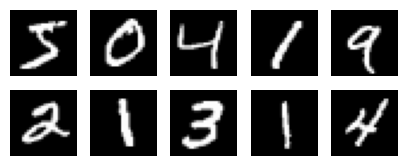

In [ ]:
visualize_img(x_train)

In [ ]:
# RGB (0-255)
# R:250 G:0 B:250 purple

In [ ]:
print(x_train[2])
print(x_train[2].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

Row:10, Column:10 -> Area's RGB: 0
Row:15, Column:4 -> Area's RGB: 253
RGB mean of Image:  24.799744897959183
RGB sum of Image:  19443
Analyze Row(14-20) Column(10-20): 
 [[ 49 116 144 150 241 243 234 179 241 252]
 [254 250 240 198 143  91  28   5 233 250]
 [ 98  56   0   0   0   0   0 102 254 220]
 [  0   0   0   0   0   0   0 169 254 137]
 [  0   0   0   0   0   0   0 169 254  57]
 [  0   0   0   0   0   0   0 169 254  57]]
Analyze's mean of Row(14-20) Column(10-20):  96.51666666666667


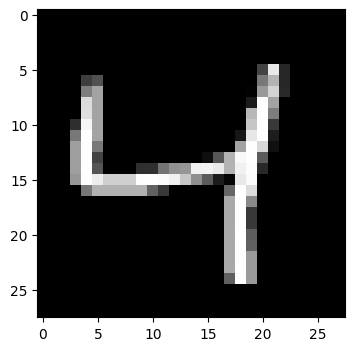

In [ ]:
print("Row:10, Column:10 -> Area's RGB:", x_train[2][10,10])
print("Row:15, Column:4 -> Area's RGB:", x_train[2][15,4])
print("RGB mean of Image: ", x_train[2].mean())
print("RGB sum of Image: ", x_train[2].sum())
print("Analyze Row(14-20) Column(10-20): \n", x_train[2][14:20,10:20])
print("Analyze's mean of Row(14-20) Column(10-20): ", x_train[2][14:20,10:20].mean())
plt.figure(figsize=(4,4))
plt.imshow(x_train[2],cmap='gray')

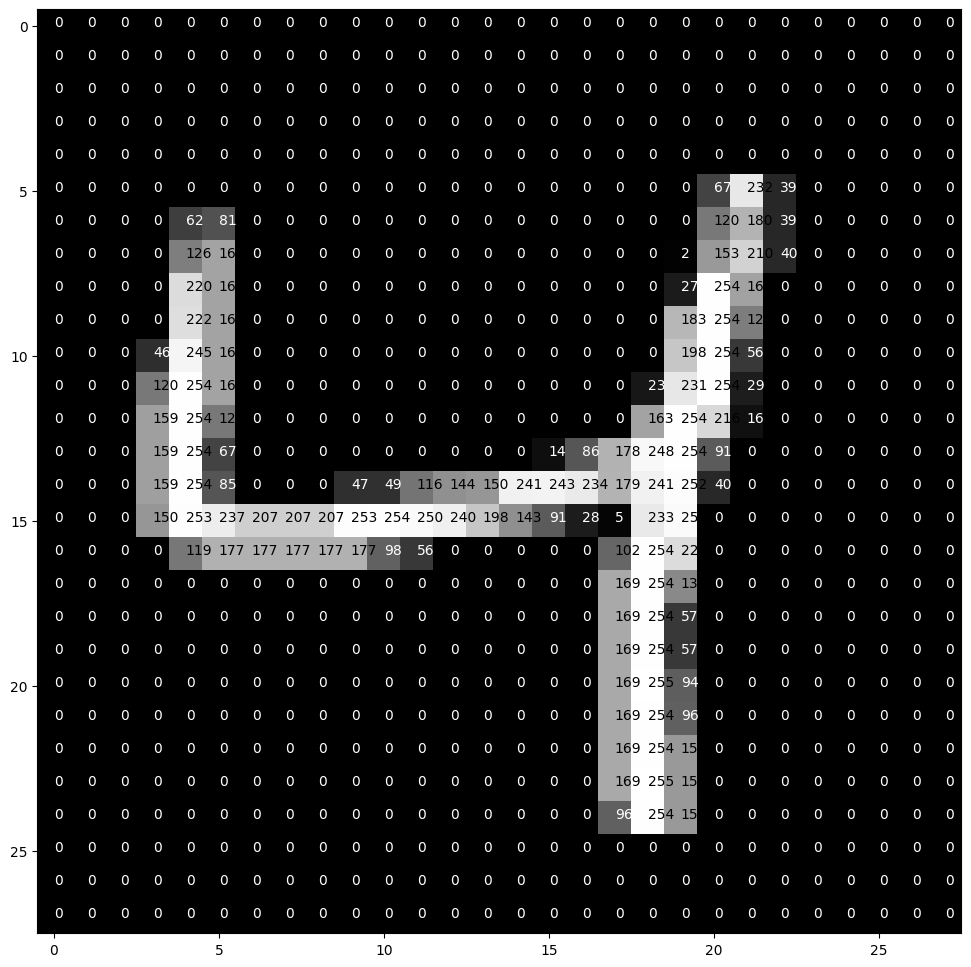

In [ ]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                  color='white' if img[x][y]<threshold else 'black')

pixel_visualize(x_train[2])

#  Data Preparation

>Encoding
* Before: [0 1 2 3 4 5 6 7 8 9]
* After: [0 0 1 0 0 0 0 0 0 0]








In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)



> Reshaping





In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


> Normalization

In [ ]:
x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

# Modelling

In [ ]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation='relu',name='layer1'),
    Dense(units=num_labels, activation='softmax',name='output_layer')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=5,batch_size=12,validation_data=(x_test,y_test))

Epoch 1/5
5000/5000 [==============================] - 31s 6ms/step - loss: 0.0300 - precision: 0.9906 - recall: 0.9891 - accuracy: 0.9899 - val_loss: 0.0866 - val_precision: 0.9765 - val_recall: 0.9740 - val_accuracy: 0.9753
Epoch 2/5
5000/5000 [==============================] - 29s 6ms/step - loss: 0.0247 - precision: 0.9927 - recall: 0.9915 - accuracy: 0.9920 - val_loss: 0.0878 - val_precision: 0.9800 - val_recall: 0.9786 - val_accuracy: 0.9792
Epoch 3/5
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0209 - precision: 0.9934 - recall: 0.9925 - accuracy: 0.9930 - val_loss: 0.0906 - val_precision: 0.9801 - val_recall: 0.9782 - val_accuracy: 0.9788
Epoch 4/5
5000/5000 [==============================] - 28s 6ms/step - loss: 0.0191 - precision: 0.9940 - recall: 0.9933 - accuracy: 0.9936 - val_loss: 0.0879 - val_precision: 0.9804 - val_recall: 0.9795 - val_accuracy: 0.9799
Epoch 5/5
5000/5000 [==============================] - 27s 5ms/step - loss: 0.0158 - precision: 

# Model Performance Evaluation

In [ ]:
history = model.fit(x_train,y_train,epochs=10,batch_size=12,validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0143 - precision: 0.9955 - recall: 0.9952 - accuracy: 0.9953 - val_loss: 0.1065 - val_precision: 0.9786 - val_recall: 0.9776 - val_accuracy: 0.9779
Epoch 2/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0134 - precision: 0.9956 - recall: 0.9954 - accuracy: 0.9955 - val_loss: 0.1051 - val_precision: 0.9789 - val_recall: 0.9780 - val_accuracy: 0.9784
Epoch 3/10
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0114 - precision: 0.9965 - recall: 0.9962 - accuracy: 0.9963 - val_loss: 0.1045 - val_precision: 0.9789 - val_recall: 0.9781 - val_accuracy: 0.9786
Epoch 4/10
5000/5000 [==============================] - 28s 6ms/step - loss: 0.0110 - precision: 0.9964 - recall: 0.9961 - accuracy: 0.9963 - val_loss: 0.0971 - val_precision: 0.9820 - val_recall: 0.9811 - val_accuracy: 0.9814
Epoch 5/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.0104 - precis

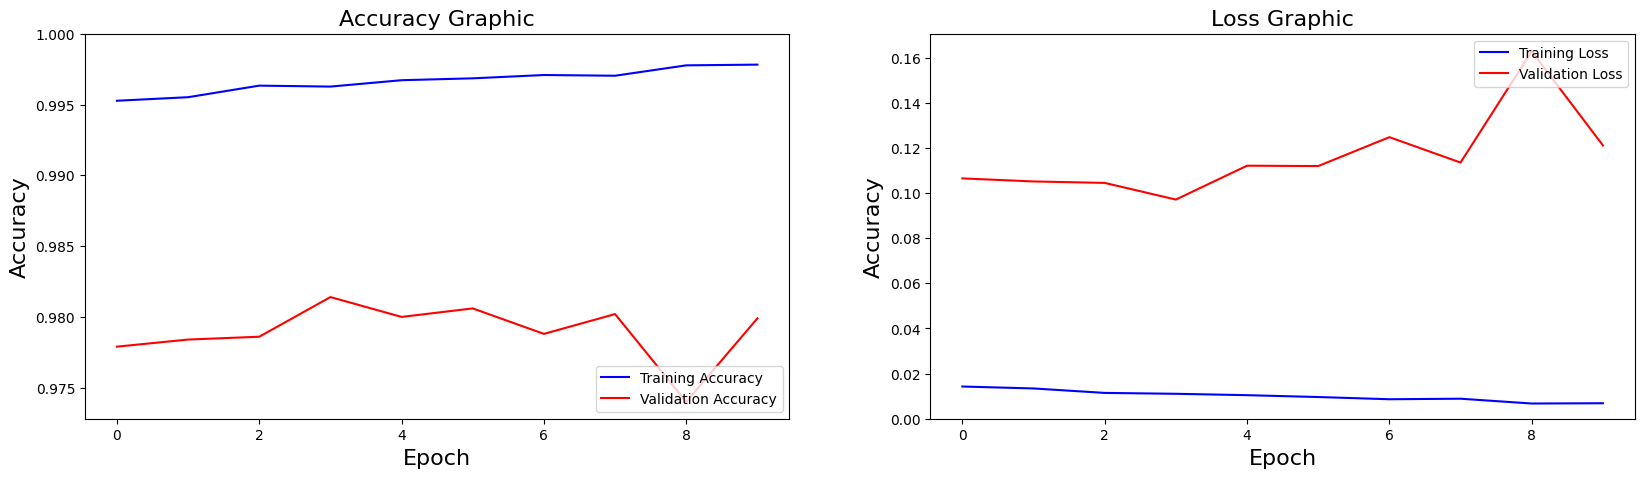

In [ ]:
# Accuracy & Loss Graphs

# Graph 1 : Accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Accuracy Graphic', fontsize=16)

# Graph 2 : Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Loss Graphic', fontsize=16)
plt.show()

In [ ]:
loss, precision, recall, acc = model.evaluate(x_test,y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 98.0%

Test Loss: 12.1%

Test Precision: 98.0%

Test Recall: 97.9%


# Prediction

In [ ]:
model.save('mnist_model.h5')

In [ ]:
import random
random = random.randint(0, x_test.shape[0])

In [ ]:
random

8478

In [ ]:
test_image=x_test[random]

In [ ]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

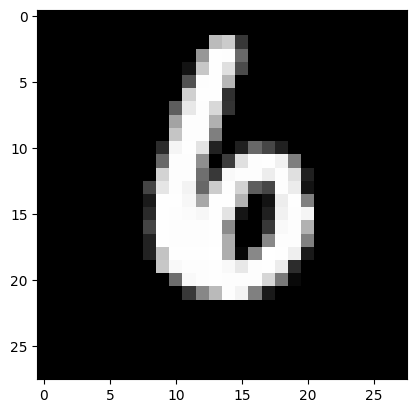

In [ ]:
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [ ]:
test_data = x_test[random].reshape(1,28,28,1)

In [ ]:
probability = model.predict(test_date)

1/1 [==============================] - 0s 398ms/step


In [ ]:
probability

array([[7.1691148e-18, 6.6258526e-24, 6.2164913e-15, 9.3067368e-17,
        1.2407437e-20, 6.5519239e-19, 1.0000000e+00, 3.7889743e-24,
        9.9343164e-20, 3.7388086e-31]], dtype=float32)

In [ ]:
predicted_class = np.argmax(probability)

In [ ]:
predicted_class

6

In [ ]:
print(f'Predicted Class: {predicted_class}\n')
print(f'Probability Value of the Predicted Class: {(np.max(probability, axis=-1))[0]}\n')
print(f'Probability Values of Other Classes: {probability}\n')

Predicted Class: 6

Probability Value of the Predicted Class: 1.0

Probability Values of Other Classes: [[7.1691148e-18 6.6258526e-24 6.2164913e-15 9.3067368e-17 1.2407437e-20
  6.5519239e-19 1.0000000e+00 3.7889743e-24 9.9343164e-20 3.7388086e-31]]

